In [1]:
# import section
import math
import numpy as np
import matplotlib.pyplot as plt
import openmc

In [2]:
# parameters

# rotations and translations
t1y = -22.86  # cm - translation along y of target assembly
r1phi = 0  # deg - rotation of target assembly around x
r1theta = 0  # deg - rotation of target assembly around y
r1psi = 15  # deg - rotation of target assembly around z
t2y = 29.520  # cm - translation along y of assembly and auxiliary shield (170*cos(10))
t2z = 167.417  # cm - translation along z of assembly and auxiliary shield (170*sin(10))
r2phi = -10  # deg - rotation of room2, assembly and aux shield around x
r2theta = 0  # deg - rotation of room2, assembly and aux shield around y
r2psi = 0  # deg - rotation of room2, assembly and aux shield around z

# transformations
r1 = (r1phi, r1theta, r1psi)  # for rotation matrix
r2 = (r2phi, r2theta, r2psi)  # for rotation matrix
t1 = (0, t1y, 0)  # translation vector
t2 = (0, t2y, t2z)  # translation vector

In [3]:
# MATERIALS
# materials for experimental setup
# m1 copper
copper = openmc.Material(material_id=1, name='cu')
copper.add_element('Cu', 1.0, 'ao')
copper.set_density('g/cm3', 8.93)
# m2 cooling water
cool_water = openmc.Material(material_id=2, name='cool_water')
cool_water.add_element('H', 0.667, 'ao')
cool_water.add_element('O', 0.333, 'ao')
cool_water.set_density('g/cm3', 1.00)
# m3 copper:58% & water:42%
watercu_mix = openmc.Material(material_id=3, name='watercu_mix')
watercu_mix.add_element('H', 0.280, 'ao')
watercu_mix.add_element('O', 0.140, 'ao')
watercu_mix.add_element('Cu', 0.58, 'ao')
watercu_mix.set_density('g/cm3', 5.60)
# m4 SS-304
ss304 = openmc.Material(material_id=4, name='ss304')
ss304.add_element('Cr', 0.19, 'wo')
ss304.add_element('Mn', 0.01, 'wo')
ss304.add_element('Fe', 0.71, 'wo')
ss304.add_element('Ni', 0.09, 'wo')
ss304.set_density('g/cm3', 7.80)
# m5 aluminum
aluminum = openmc.Material(material_id=5, name='aluminum')
aluminum.add_element('Al', 1.0, 'ao')
aluminum.set_density('g/cm3', 2.69)
# m6 air
air = openmc.Material(material_id=6, name='air')
air.add_element('N', 0.78, 'ao')
air.add_element('O', 0.22, 'ao')
air.add_element('Ar', 0.01, 'ao')
air.set_density('g/cm3', 1.2e-3)
# m7 mortar
mortar = openmc.Material(material_id=7, name='mortar')
mortar.add_element('H', 6.5972e-3, 'ao')
mortar.add_element('C', 7.4297e-4, 'ao')
mortar.add_element('O', 3.7680e-2, 'ao')
mortar.add_element('Na', 5.0802e-4, 'ao')
mortar.add_element('Mg', 4.6874e-4, 'ao')
mortar.add_element('Al', 1.9408e-3, 'ao')
mortar.add_element('Si', 1.1347e-2, 'ao')
mortar.add_element('K', 3.3427e-4, 'ao')
mortar.add_element('Ca', 3.7143e-3, 'ao')
mortar.add_element('Fe', 6.8100e-4, 'ao')
mortar.set_density('atom/b-cm', 0.066842)
# m8 concrete
concrete = openmc.Material(material_id=8, name='concrete')
concrete.add_element('H', 5.5818e-3, 'ao')
concrete.add_element('C', 5.4090e-4, 'ao')
concrete.add_element('O', 4.3150e-2, 'ao')
concrete.add_element('Na', 7.8590e-4, 'ao')
concrete.add_element('Mg', 3.8240e-4, 'ao')
concrete.add_element('Al', 2.6370e-3, 'ao')
concrete.add_element('Si', 1.4810e-2, 'ao')
concrete.add_element('K', 5.2880e-4, 'ao')
concrete.add_element('Ca', 2.5640e-3, 'ao')
concrete.add_element('Fe', 5.8590e-4, 'ao')
concrete.set_density('atom/b-cm', 0.073959)
# # m9 B4C plate --- can't find any cell with this material in MCNP input
# b4c = openmc.Material(material_id=9, name='b4c')
# b4c.add_element('B', 4.0, 'ao')
# b4c.add_element('C', 1.0, 'ao')
# b4c.set_density('g/cm3',      )
# m11 iron for the assembly
iron_ass = openmc.Material(material_id=11, name='iron_ass')
iron_ass.add_element('C', 6.0860e-4, 'ao')
iron_ass.add_nuclide('Si28', 3.6065e-4, 'ao')
iron_ass.add_nuclide('Si29', 0.1843e-4, 'ao')
iron_ass.add_nuclide('Si30', 0.1221e-4, 'ao')
iron_ass.add_element('P', 3.0452e-5, 'ao')
iron_ass.add_nuclide('S32', 5.5899e-06, 'ao')
iron_ass.add_nuclide('S33', 4.4122e-08, 'ao')
iron_ass.add_nuclide('S34', 2.4767e-07, 'ao')
iron_ass.add_nuclide('S36', 1.1766e-09, 'ao')
iron_ass.add_element('Mn', 9.0565e-4, 'ao')
iron_ass.add_nuclide('Fe54', 4.8262e-3, 'ao')
iron_ass.add_nuclide('Fe56', 7.6320e-2, 'ao')
iron_ass.add_nuclide('Fe57', 1.8306e-3, 'ao')
iron_ass.add_nuclide('Fe58', 2.3299e-4, 'ao')
iron_ass.set_density('g/cm3', 7.8312)
# m12 iron/PE for auxiliary shield
iron_aux = openmc.Material(material_id=12, name='iron_aux')
iron_aux.add_element('H', 1.6314e-2, 'ao')
iron_aux.add_element('C', 8.6509e-3, 'ao')
iron_aux.add_nuclide('Si28', 2.1947e-04, 'ao')
iron_aux.add_nuclide('Si29', 1.1113e-05, 'ao')
iron_aux.add_nuclide('Si30', 7.3768e-06, 'ao')
iron_aux.add_element('P', 1.9505e-5, 'ao')
iron_aux.add_nuclide('S32', 6.7134e-06, 'ao')
iron_aux.add_nuclide('S33', 5.2989e-08, 'ao')
iron_aux.add_nuclide('S34', 2.9744e-07, 'ao')
iron_aux.add_nuclide('S36', 1.4130e-09, 'ao')
iron_aux.add_element('Mn', 5.6358e-4, 'ao')
iron_aux.add_nuclide('Fe54', 3.8754e-03, 'ao')
iron_aux.add_nuclide('Fe56', 6.1285e-02, 'ao')
iron_aux.add_nuclide('Fe57', 1.4700e-003, 'ao')
iron_aux.add_nuclide('Fe58', 1.8709e-04, 'ao')
iron_aux.set_density('g/cm3', 6.46)

# modified density materials
# m21 water for lateral collector
lat_water = openmc.Material(material_id=21, name='lat_water')
lat_water.add_element('H', 0.667)
lat_water.add_element('O', 0.333)
lat_water.set_density('g/cm3', 0.10)
# m22 water for bottom collector
bot_water = openmc.Material(material_id=22, name='bot_water')
bot_water.add_element('H', 0.667)
bot_water.add_element('O', 0.333)
bot_water.set_density('g/cm3', 0.50)
# m41 SS-304 for accelerator components 1
ss304_acc1 = openmc.Material(material_id=41, name='ss304_acc1')
ss304_acc1.add_element('Cr', 0.19, 'wo')
ss304_acc1.add_element('Mn', 0.01, 'wo')
ss304_acc1.add_element('Fe', 0.71, 'wo')
ss304_acc1.add_element('Ni', 0.09, 'wo')
ss304_acc1.set_density('g/cm3', 2.60)
# m42 SS-304 for accelerator components 2
ss304_acc2 = openmc.Material(material_id=42, name='ss304_acc2')
ss304_acc2.add_element('Cr', 0.19, 'wo')
ss304_acc2.add_element('Mn', 0.01, 'wo')
ss304_acc2.add_element('Fe', 0.71, 'wo')
ss304_acc2.add_element('Ni', 0.09, 'wo')
ss304_acc2.set_density('g/cm3', 1.56)

# materials for dosimetry
# m31 B-10(n,a)Li-7
b10 = openmc.Material(material_id=31, name='b10')
b10.add_nuclide('B10', 1.0, 'ao')
b10.set_density('g/cm3', 1)
# m32 Al-27(n,a)Na-27
al27 = openmc.Material(material_id=32, name='al27')
al27.add_nuclide('Al27', 1.0, 'ao')
al27.set_density('g/cm3', 2.7)
# m33 Nb-93(n,2n)Nb-92m
nb93 = openmc.Material(material_id=33, name='nb93')
nb93.add_nuclide('Nb93', 1.0, 'ao')
# nb93.set_density('g/cm3', 18.57)
nb93.set_density('g/cm3', 1.2e-3)  # air density
# m34 In-115(n,n')In-115m
in115 = openmc.Material(material_id=34, name='in115')
in115.add_nuclide('In115', 1.0, 'ao')
# in115.set_density('g/cm3', 7.31)
in115.set_density('g/cm3', 1.2e-3)
# m35 Au-197(n,g)Au-198
au197 = openmc.Material(material_id=35, name='au197')
au197.add_nuclide('Au197', 1.0, 'ao')
# au197.set_density('g/cm3', 19.3)
au197.set_density('g/cm3', 1.2e-3)
# m36 U-235(n,fission)
u235 = openmc.Material(material_id=36, name='u235')
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cm3', 1)
# m37 U-238(n,fission)
u238 = openmc.Material(material_id=37, name='u238')
u238.add_nuclide('U238', 1.0, 'ao')
u238.set_density('g/cm3', 1)
# m38 Cd-Cover Attenuation
cd_cover = openmc.Material(material_id=38, name='cd_cover')
cd_cover.add_nuclide('Cd106', 0.0125, 'ao')
cd_cover.add_nuclide('Cd108', 0.0089, 'ao')
cd_cover.add_nuclide('Cd110', 0.1249, 'ao')
cd_cover.add_nuclide('Cd111', 0.1280, 'ao')
cd_cover.add_nuclide('Cd112', 0.2413, 'ao')
cd_cover.add_nuclide('Cd113', 0.1222, 'ao')
cd_cover.add_nuclide('Cd114', 0.2873, 'ao')
cd_cover.add_nuclide('Cd116', 0.0749, 'ao')
cd_cover.set_density('g/cm3', 1)

# Mixed activation foil detector material
mixed_detector = openmc.Material.mix_materials([nb93, in115, au197, air], [1/3, 1/3, 1/3, 0.00], 'vo')

# instantiate material collection
materials = openmc.Materials([copper, cool_water, watercu_mix, ss304, aluminum, air,  mortar, concrete,
                            iron_ass, iron_aux, lat_water, bot_water, ss304_acc1, ss304_acc2, b10, al27,
                            nb93, au197, u235, u238, cd_cover, mixed_detector])
# set cross section library
materials.cross_sections = r'/home/segantin/openmc_models/CROSS_SECTIONS/endfb80_hdf5/cross_sections.xml'
# materials.cross_sections = r'/home/segantin/openmc_models/CROSS_SECTIONS/fendl-3.2-hdf5/cross_sections.xml'

# export to XML
materials.export_to_xml()

In [4]:
# GEOMETRY

# SURFACES

# ---------- Surfaces for Describing the Target Assembly ----------

# Surfaces for spherical target disk & duct cone
so_target1 = openmc.Sphere(x0=0, y0=0, z0=0, r=22.8599, name='so_target1').rotate(r1).translate(t1)  #      - Cu ## t1+r1 (translation1 + rotation1)
so_target2 = openmc.Sphere(x0=0, y0=0, z0=0, r=22.94, name='so_target2').rotate(r1).translate(t1)  # Cu   - H2O ## t1+r1
so_target3 = openmc.Sphere(x0=0, y0=0, z0=0, r=23.04, name='so_target3').rotate(r1).translate(t1)  # H2O  - SS304 ## t1+r1
so_target4 = openmc.Sphere(x0=0, y0=0, z0=0, r=23.12, name='so_target4').rotate(r1).translate(t1) # SS304- ## t1+r1
ky_target5 = openmc.YCone(x0=0, y0=-26.882, z0=0, r2=0.0594735, name='ky_target5').rotate(r1).translate(t1)  # inner cone of duct ## t1+r1
ky_target6 = openmc.YCone(x0=0, y0=-27.304, z0=0, r2=0.0594735, name='ky_target6').rotate(r1).translate(t1)  # outer code of duct ## t1+r1
py_target7 = openmc.YPlane(y0=10.0, name='py_target7').rotate(r1).translate(t1)  # ambiguity surface ## t1+r1

# Surfaces for cooling water cover
cy_watercover11 = openmc.YCylinder(x0=0.0, z0=0.0, r=12.75, name='cy_watercover11').rotate(r1).translate(t1)  # inner cylinder ## t1+r1
cy_watercover12 = openmc.YCylinder(x0=0.0, z0=0.0, r=12.85, name='cy_watercover12').rotate(r1).translate(t1)  # outer cylinder ## t1+r1
cy_watercover13 = openmc.YCylinder(x0=0.0, z0=0.0, r=15.25, name='cy_watercover13').rotate(r1).translate(t1)  # edge of flange ## t1+r1
py_watercover14 = openmc.YPlane(y0=19.21, name='py_watercover14').rotate(r1).translate(t1)  # flange #1-1 ## t1+r1
py_watercover15 = openmc.YPlane(y0=18.36, name='py_watercover15').rotate(r1).translate(t1)  # flange #1-2 ## t1+r1
py_watercover16 = openmc.YPlane(y0=6.56, name='py_watercover16').rotate(r1).translate(t1)  # flange #2-1 ## t1+r1
py_watercover17 = openmc.YPlane(y0=5.86, name='py_watercover17').rotate(r1).translate(t1)  # rear plate-1 ## t1+r1
py_watercover18 = openmc.YPlane(y0=5.71, name='py_watercover18').rotate(r1).translate(t1)  # flange #2-2 & rear plate-2 ## t1+r1
cox_watercover21 = openmc.XCylinder(y0=12.36, z0=0.0, r=5.8, name='cox_watercover21').rotate(r1).translate(t1)  # lateral face of drain ## t1+r1
px_watercover22 = openmc.XPlane(x0=-20.0, name='px_watercover22').rotate(r1).translate(t1)  # bottom of drain ## t1+r1
px_watercover23 = openmc.XPlane(x0=0.0, name='px_watercover23').rotate(r1).translate(t1)  # x-z plane ## t1+r1

# Surfaces for support structure
py_supp31 = openmc.YPlane(y0=3.86, name='py_supp31').rotate(r1).translate(t1)  # front surface ## t1+r1
py_supp32 = openmc.YPlane(y0=-2.14, name='py_supp32').rotate(r1).translate(t1)  # rear surface ## t1+r1
cy_supp33 = openmc.YCylinder(x0=0.0, z0=0.0, r=9.0, name='cy_supp33').rotate(r1).translate(t1)  # lateral surface ## t1+r1

# Surfaces for water tube
cox_watertube41 = openmc.XCylinder(y0=23.96, z0=0.0, r=0.55, name='cox_watertube41').rotate(r1).translate(t1)  # inner cylinder ## t1+r1
cox_watertube42 = openmc.XCylinder(y0=23.96, z0=0.0, r=0.65, name='cox_watertube42').rotate(r1).translate(t1)  # outer cylinder ## t1+r1
px_watertube43 = openmc.XPlane(x0=-12.5, name='watertube43').rotate(r1).translate(t1)  # lower surface ## t1+r1
px_watertube44 = openmc.XPlane(x0=0.65, name='watertube44').rotate(r1).translate(t1)  # upper surface ## t1+r1

# Surfaces for collimator
ky_collimator51 = openmc.YCone(x0=0, y0=21.88, z0=0, r2=1.05872e-3, name='ky_collimator51')  # inner cone
ky_collimator52 = openmc.YCone(x0=0, y0=34.17, z0=0, r2=1.05872e-3, name='ky_collimator52')  # outer cone
py_collimator53 = openmc.YPlane(y0=-1.17, name='py_collimator53')  # boundary-1
py_collimator54 = openmc.YPlane(y0=-15.0, name='py_collimator54')  # boundary-2

# Surface to separate target region from outer regions
so_separe61 = openmc.Sphere(x0=0, y0=0, z0=0, r=50.0, name='so_separe61')  # sphere

# ---------- Surfaces for Describing the 2nd Target Room ----------

# Surfaces for room walls
py_rw101 = openmc.YPlane(y0=-248.0, name='py_rw101').rotate(r2)  #        - mortar  ## r2
py_rw102 = openmc.YPlane(y0=248.0, name='py_rw102').rotate(r2)  #        - mortar  ## r2
py_rw103 = openmc.YPlane(y0=-250.0, name='py_rw103').rotate(r2)  # mortar - conc.  ## r2
py_rw104 = openmc.YPlane(y0=250.0, name='py_rw104').rotate(r2)  # mortar - conc.  ## r2
py_rw105 = openmc.YPlane(y0=-259.0, name='py_rw105').rotate(r2)  # conc.  - conc.  ## r2
py_rw106 = openmc.YPlane(y0=259.0, name='py_rw106').rotate(r2)  # conc.  - conc.  ## r2
py_rw107 = openmc.YPlane(y0=-268.0, boundary_type='vacuum', name='py_rw107').rotate(r2)  # conc.  -  ## r2
py_rw108 = openmc.YPlane(y0=268.0, boundary_type='vacuum', name='py_rw108').rotate(r2)  # conc.  -  ## r2
#
px_rw111 = openmc.XPlane(x0=-180.0, name='px_rw111').rotate(r2)  #         - mortar  ## r2
px_rw112 = openmc.XPlane(x0=270.0, name='px_rw112').rotate(r2)  #         - mortar  ## r2
px_rw113 = openmc.XPlane(x0=-182.0, name='px_rw113').rotate(r2)  # mortar - conc.  ## r2
px_rw114 = openmc.XPlane(x0=272.0, name='px_rw114').rotate(r2)  # mortar - conc.  ## r2
px_rw115 = openmc.XPlane(x0=-191.0, name='px_rw115').rotate(r2)  # conc.  - conc.  ## r2
px_rw116 = openmc.XPlane(x0=281.0, name='px_rw116').rotate(r2)  # conc.  - conc.  ## r2
px_rw117 = openmc.XPlane(x0=-200.0, boundary_type='vacuum', name='px_rw117').rotate(r2)  # conc.  -  ## r2
px_rw118 = openmc.XPlane(x0=290.0, boundary_type='vacuum', name='px_rw118').rotate(r2)  # conc.  -  ## r2
#
pz_rw121 = openmc.ZPlane(z0=-248.0, name='pz_rw121').rotate(r2)  #        - mortar  ## r2
pz_rw122 = openmc.ZPlane(z0=248.0, name='pz_rw122').rotate(r2)  #        - mortar  ## r2
pz_rw123 = openmc.ZPlane(z0=-250.0, name='pz_rw123').rotate(r2)  # mortar - conc.  ## r2
pz_rw124 = openmc.ZPlane(z0=250.0, name='pz_rw124').rotate(r2)  # mortar - conc.  ## r2
pz_rw125 = openmc.ZPlane(z0=-259.0, name='pz_rw125').rotate(r2)  # conc.  - conc.  ## r2
pz_rw126 = openmc.ZPlane(z0=259.0, name='pz_rw126').rotate(r2)  # conc.  - conc.  ## r2
pz_rw127 = openmc.ZPlane(z0=-268.0, boundary_type='vacuum', name='pz_rw127').rotate(r2)  # conc.  -  ## r2
pz_rw128 = openmc.ZPlane(z0=268.0, name='pz_rw128').rotate(r2)  # conc.  -  ## r2

# Surfaces around the opening for the streaming assembly 
py_osa131 = openmc.YPlane(y0=-125.0, name='py_osa131').rotate(r2)  #        - iron  ## r2
py_osa132 = openmc.YPlane(y0=125.0, name='py_osa132').rotate(r2)  #        - iron  ## r2
py_osa133 = openmc.YPlane(y0=-126.0, name='py_osa133').rotate(r2)  # iron   - conc.  ## r2
py_osa134 = openmc.YPlane(y0=126.0, name='py_osa134').rotate(r2)  # iron   - conc.  ## r2
py_osa135 = openmc.YPlane(y0=-134.2, name='py_osa135').rotate(r2)  # conc.  - conc.  ## r2
py_osa136 = openmc.YPlane(y0=134.2, name='py_osa136').rotate(r2)  # conc.  - conc.  ## r2
py_osa137 = openmc.YPlane(y0=-142.2, name='py_osa137').rotate(r2)  # conc.  - conc.  ## r2
py_osa138 = openmc.YPlane(y0=142.2, name='py_osa138').rotate(r2)  # conc.  - conc.  ## r2
#
px_osa141 = openmc.XPlane(x0=-176.5, name='px_osa141').rotate(r2)  # upper of base iron plate  ## r2
px_osa142 = openmc.XPlane(x0=130.0, name='px_osa142').rotate(r2)  #        - iron  ## r2
px_osa143 = openmc.XPlane(x0=131.2, name='px_osa143').rotate(r2)  # iron   - conc.  ## r2
px_osa144 = openmc.XPlane(x0=139.2, name='px_osa144').rotate(r2)  # conc.  - conc.  ## r2
px_osa145 = openmc.XPlane(x0=147.2, name='px_osa145').rotate(r2)  # conc.  - conc.  ## r2
#
pz_osa151 = openmc.ZPlane(z0=120.0, name='pz_osa151').rotate(r2)  # front end of base iron plate  ## r2
pz_osa152 = openmc.ZPlane(z0=450.0, name='pz_osa152').rotate(r2)  # rear end of base iron plate  ## r2
#
py_osa160 = openmc.YPlane(y0=-50.0, name='py_osa160')  # for accelerator components
py_osa161 = openmc.YPlane(y0=100.0, name='py_osa161')  # for accelerator components
px_osa162 = openmc.XPlane(x0=30.0, name='px_osa162')  # for accelerator components
pz_osa163 = openmc.ZPlane(z0=-30.0, name='pz_osa163')  # for accelerator components
pz_osa164 = openmc.ZPlane(z0=30.0, name='pz_osa164')  # for accelerator components

# ---------- Surfaces for Describing the Streaming Assembly & Auxiliary Shield  ----------

# A space defined by -125<X<125, -176.5<Y<130 & 120<Z must be specified.
py_sas203 = openmc.YPlane(y0=-15.0, name='py_sas203').rotate(r2).translate(t2)  # side of duct  ## t2+r2
py_sas204 = openmc.YPlane(y0=15.0, name='py_sas204').rotate(r2).translate(t2)  # side of duct  ## t2+r2
py_sas207 = openmc.YPlane(y0=-50.0, name='py_sas207').rotate(r2).translate(t2)  # side of shield  ## t2+r2
py_sas208 = openmc.YPlane(y0=55.0, name='py_sas208').rotate(r2).translate(t2)  # side of shield  ## t2+r2
py_sas209 = openmc.YPlane(y0=-70.0, name='py_sas209').rotate(r2).translate(t2)  # side of iron block  ## t2+r2
py_sas210 = openmc.YPlane(y0=70.0, name='py_sas210').rotate(r2).translate(t2)  # side of iron block  ## t2+r2
py_sas211 = openmc.YPlane(y0=-75.0, name='py_sas211').rotate(r2).translate(t2)  # side of support of iron  ## t2+r2
py_sas212 = openmc.YPlane(y0=75.0, name='py_sas212').rotate(r2).translate(t2)  # side of support of iron  ## t2+r2
#
px_sas221 = openmc.XPlane(x0=-146.5, name='px_sas221').rotate(r2).translate(t2)  # bottom of auxiliary shield  ## t2+r2
px_sas222 = openmc.XPlane(x0=-90.0, name='px_sas222').rotate(r2).translate(t2)  # bottom of iron base plate  ## t2+r2
px_sas223 = openmc.XPlane(x0=-85.0, name='px_sas223').rotate(r2).translate(t2)  # bottom of iron expt. assembly  ## t2+r2
px_sas224 = openmc.XPlane(x0=-70.0, name='px_sas224').rotate(r2).translate(t2)  # bottom of entrance window  ## t2+r2
px_sas225 = openmc.XPlane(x0=-73.7, name='px_sas225').rotate(r2).translate(t2)  # bottom of rear iron cap  ## t2+r2
px_sas227 = openmc.XPlane(x0=55.0, name='px_sas227').rotate(r2).translate(t2)  # top of iron expt. assembly  ## t2+r2
px_sas228 = openmc.XPlane(x0=75.0, name='px_sas228').rotate(r2).translate(t2)  # top of entrance window  ## t2+r2
px_sas261 = openmc.XPlane(x0=-75.0, name='px_sas261').rotate(r2).translate(t2)  # bottom of third leg  ## t2+r2
px_sas262 = openmc.XPlane(x0=-45.0, name='px_sas262').rotate(r2).translate(t2)  # top of third leg  ## t2+r2
px_sas263 = openmc.XPlane(x0=-15.0, name='px_sas263').rotate(r2).translate(t2)  # bottom of first leg  ## t2+r2
px_sas264 = openmc.XPlane(x0=15.0, name='px_sas264').rotate(r2).translate(t2)  # stop of first leg  ## t2+r2
#
pz_sas231 = openmc.ZPlane(z0=-20.0, name='pz_sas231').rotate(r2).translate(t2)  # front surface of auxiliary shield  ## t2+r2
pz_sas235 = openmc.ZPlane(z0=0.0, name='pz_sas235').rotate(r2).translate(t2)  # front surface of iron expt. assembly  ## t2+r2
pz_sas237 = openmc.ZPlane(z0=24.0, name='pz_sas237').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas238 = openmc.ZPlane(z0=30.0, name='pz_sas238').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas239 = openmc.ZPlane(z0=48.0, name='pz_sas239').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas242 = openmc.ZPlane(z0=47.5, name='pz_sas242').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas243 = openmc.ZPlane(z0=65.0, name='pz_sas243').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas244 = openmc.ZPlane(z0=96.0, name='pz_sas244').rotate(r2).translate(t2)  # for boundary of imp.  ## t2+r2
pz_sas245 = openmc.ZPlane(z0=130.0, name='pz_sas245').rotate(r2).translate(t2)  # duct surface  ## t2+r2
pz_sas250 = openmc.ZPlane(z0=180.0, name='pz_sas250').rotate(r2).translate(t2)  # rear surface of auxiliary shield  ## t2+r2
pz_sas251 = openmc.ZPlane(z0=200.0, name='pz_sas251').rotate(r2).translate(t2)  # rear surface of cavity  ## t2+r2
pz_sas252 = openmc.ZPlane(z0=220.0, name='pz_sas252').rotate(r2).translate(t2)  # rear surface of iron cap  ## t2+r2
pz_sas253 = openmc.ZPlane(z0=100.0, name='pz_sas253').rotate(r2).translate(t2)  # duct surface  ## t2+r2
#
py_sas271 = openmc.YPlane(y0=-2.0, name='py_sas271').rotate(r2).translate(t2)  # side of cell detectors  ## t2+r2
py_sas272 = openmc.YPlane(y0=2.0, name='py_sas272').rotate(r2).translate(t2)  # side of cell detectors  ## t2+r2
#
px_sas281 = openmc.XPlane(x0=-62.0, name='px_sas281').rotate(r2).translate(t2)  # for cell detectors at X =-60  ## t2+r2
px_sas282 = openmc.XPlane(x0=-58.0, name='px_sas282').rotate(r2).translate(t2)  # for cell detectors at X =-60  ## t2+r2
px_sas283 = openmc.XPlane(x0=-32.0, name='px_sas283').rotate(r2).translate(t2)  # for cell detectors at X =-30  ## t2+r2
px_sas284 = openmc.XPlane(x0=-28.0, name='px_sas284').rotate(r2).translate(t2)  # for cell detectors at X =-30  ## t2+r2
px_sas285 = openmc.XPlane(x0=-2.0, name='px_sas285').rotate(r2).translate(t2)  # for cell detectors at X =  0  ## t2+r2
px_sas286 = openmc.XPlane(x0=2.0, name='px_sas286').rotate(r2).translate(t2)  # for cell detectors at X =  0  ## t2+r2
px_sas287 = openmc.XPlane(x0=28.0, name='px_sas287').rotate(r2).translate(t2)  # for cell detectors at X = 30  ## t2+r2
px_sas288 = openmc.XPlane(x0=32.0, name='px_sas288').rotate(r2).translate(t2)  # for cell detectors at X = 30  ## t2+r2
px_sas289 = openmc.XPlane(x0=58.0, name='px_sas289').rotate(r2).translate(t2)  # for cell detectors at X = 60  ## t2+r2
px_sas290 = openmc.XPlane(x0=62.0, name='px_sas290').rotate(r2).translate(t2)  # for cell detectors at X = 60  ## t2+r2
pz_sas291 = openmc.ZPlane(z0=-19.0, name='pz_sas291').rotate(r2).translate(t2)  # for cell detectors at Z = -20  ## t2+r2
pz_sas292 = openmc.ZPlane(z0=1.0, name='pz_sas292').rotate(r2).translate(t2)  # for cell detectors at Z = 0  ## t2+r2
pz_sas293 = openmc.ZPlane(z0=49.5, name='pz_sas293').rotate(r2).translate(t2)  # for cell detectors at Z = 50  ## t2+r2
pz_sas294 = openmc.ZPlane(z0=50.5, name='pz_sas294').rotate(r2).translate(t2)  # for cell detectors at Z = 50  ## t2+r2
pz_sas295 = openmc.ZPlane(z0=114.5, name='pz_sas295').rotate(r2).translate(t2)  # for cell detectors at Z = 115  ## t2+r2
pz_sas296 = openmc.ZPlane(z0=115.5, name='pz_sas296').rotate(r2).translate(t2)  # for cell detectors at Z = 115  ## t2+r2
pz_sas297 = openmc.ZPlane(z0=139.5, name='pz_sas297').rotate(r2).translate(t2)  # for cell detectors at Z = 140  ## t2+r2
pz_sas298 = openmc.ZPlane(z0=140.5, name='pz_sas298').rotate(r2).translate(t2)  # for cell detectors at Z = 140  ## t2+r2
pz_sas299 = openmc.ZPlane(z0=181.0, name='pz_sas299').rotate(r2).translate(t2)  # for cell detectors at Z = 180  ## t2+r2
so_sas300 = openmc.Sphere(x0=0, y0=0, z0=0, r=1000, boundary_type='vacuum', name='so_sas300')  # 

# GEOMETRY

# creating regions

# Target Assembly Regions
targetback_region = +so_target1 & -so_target2 & -ky_target6 & +py_target7  # target backing (Cu)
coolwater1_region = +so_target2 & -so_target3 & -ky_target6 & +py_target7  # cooling water
collimator_region = +ky_collimator51 & -ky_collimator52 & -py_collimator53 & +py_collimator54  # collimator (Cu:58%,H2O:42%)
voidduct_region = -so_target1 & -ky_target5 & +py_supp31 & ~(+ky_collimator51 & -ky_collimator52 & -py_collimator53 & +py_collimator54)  # void inside the duct
ductcone_region = +ky_target5 & -ky_target6 & +py_supp31 & -so_target1  # duct cone (SS-304)
suppstruct_region = -cy_supp33 & +py_supp32 & -py_supp31  # support structure (Al)
#
frontcover_region = +so_target3 & -so_target4  & -cy_watercover12 & +py_target7 # front cover (SS-304)
rearcover_region = +py_watercover18 & -py_watercover17 & +ky_target6 & -cy_watercover12  # rear cover  (SS-304)
latcover_region = +cy_watercover11 & -cy_watercover12 & +py_watercover17 & -so_target3  # lateral cover (Al)
flange1_region = +py_watercover15 & -py_watercover14 & +cy_watercover12 & -cy_watercover13  # flange #1 (Al)
flange2_region = +py_watercover18 & -py_watercover16 & +cy_watercover12 & -cy_watercover13  # flange #2 (Al)
latwatcoll_region = +ky_target6 & -cy_watercover11 & +py_watercover17 & -so_target3  # lateral water collector
botwatcoll_region = -cox_watercover21 & +px_watercover22 & +cy_watercover12 & -px_watercover23  # bottom water collector
#
tube_region = +cox_watertube41 & -cox_watertube42 & +px_watertube43 & -px_watertube44  # tube (SS-304)
coolwater2_region = -cox_watertube41 & +px_watertube43 & -px_watertube44  # cooling water
#
void1_region = (-so_separe61 & -py_supp32)|(-so_separe61 & +py_supp32 & -py_supp31 & +cy_supp33)|(-so_separe61 & +py_supp31 & -py_watercover18 & +ky_target6)  # void
void2_region = -so_separe61 & +py_watercover18 & -py_watercover16 & +cy_watercover13  # void
void3_region = ~(-cox_watercover21 & +px_watercover22 & +cy_watercover12 & -px_watercover23) & (-so_separe61 & +py_watercover16 & -py_watercover15 & +cy_watercover12)   # void
void4_region = -so_separe61 & +py_watercover15 & -py_watercover14 & +cy_watercover13  # void
void5_region =-so_separe61 & -cy_watercover12 & +so_target4 & ~(-cox_watertube42 & +px_watertube43 & -px_watertube44) & +py_target7  # void
void6_region = -so_separe61 & +cy_watercover12 & +py_watercover14  # void

# 2nd target room
mortarwall1_region = ~(+py_rw101 & -py_rw102 & +px_rw111 & -px_rw112 & +pz_rw121 & -pz_rw124) & +py_rw103 & -py_rw104 & +px_rw113 & -px_rw114 & +pz_rw123 & -pz_rw124  # mortar wall
concretewall1_region = ~(+py_rw103 & -py_rw104 & +px_rw113 & -px_rw114 & +pz_rw123 & -pz_rw126) & +py_rw105 & -py_rw106 & +px_rw115 & -px_rw116 & +pz_rw125 & -pz_rw126  # concrete wall
concretewall2_region = ~(+py_rw105 & -py_rw106 & +px_rw115 & -px_rw116 & +pz_rw125 & -pz_rw128) & +py_rw107 & -py_rw108 & +px_rw117 & -px_rw118 & +pz_rw127 & -pz_rw128  # concrete wall
#
mortarwall2e_region = ~(+py_osa133 & -py_osa134 & +px_rw111 & -px_osa143 & +pz_rw122 & -pz_rw124) & +py_rw101 & -py_rw102 & +px_rw111 & -px_rw112 & +pz_rw122 & -pz_rw124  # mortar wall (east)
concretewall3e_region =  ~(+py_osa133 & -py_osa134 & +px_rw111 & -px_osa143 & +pz_rw124 & -pz_rw126) & +py_rw103 & -py_rw104 & +px_rw113 & -px_rw114 & +pz_rw124 & -pz_rw126  # concrete wall (east)
concretewall4e_region = ~(+py_osa135 & -py_osa136 & +px_rw115 & -px_osa144 & +pz_rw126 & -pz_rw128) & +py_rw105 & -py_rw106 & +px_rw115 & -px_rw116 & +pz_rw126 & -pz_rw128  # concrete wall (east)
# 
ironframe_region = ~(+py_osa131 & -py_osa132 & +px_rw111 & -px_osa142 & +pz_rw122 & -pz_osa152) & +py_osa133 & -py_osa134 & +px_rw111 & -px_osa143 & +pz_rw122 & -pz_osa152  # iron frame around opening
concretewall5_region = ~(+py_osa133 & -py_osa134 & +px_rw111 & -px_osa143 & +pz_rw126 & -pz_osa152) & +py_osa135 & -py_osa136 & +px_rw115 & -px_osa144 & +pz_rw126 & -pz_osa152  # concrete wall around opening
concretewall6_region = ~(+py_osa135 & -py_osa136 & +px_rw115 & -px_osa144 & +pz_rw128 & -pz_osa152) & +py_osa137 & -py_osa138 & +px_rw117 & -px_osa145 & +pz_rw128 & -pz_osa152  # concrete wall around opening
#
ironbase_region = +px_rw111 & -px_osa141 & +py_osa131 & -py_osa132 & +pz_osa151 & -pz_osa152  #  iron base
acccomp1_region = +py_rw101 & -py_osa160 & +px_rw111 & -px_osa162 & +pz_osa163 & -pz_osa164  # accelerator components
acccomp2_region = +py_osa161 & -py_rw102 & +px_rw111 & -px_osa162 & +pz_osa163 & -pz_osa164  # accelerator components
twotrvoid1_region = ~(+py_rw101 & -py_osa160 & +px_rw111 & -px_osa162 & +pz_osa163 & -pz_osa164) & ~(+py_osa161 & -py_rw102 & +px_rw111 & -px_osa162 & +pz_osa163 & -pz_osa164) & +py_rw101 & -py_rw102 & +px_rw111 & -px_rw112 & +pz_rw121 & -pz_osa151 & +so_separe61  # void inside the 2TR
twotrvoid2_region = ~(+py_osa131 & -py_osa132 & +px_rw111 & -px_osa142 & +pz_osa151 & -pz_rw122) & +py_rw101 & -py_rw102 & +px_rw111 & -px_rw112 & +pz_osa151 & -pz_rw122    # void inside the 2TR

# auxiliary shield
frontassvoid1_region = +py_osa131 & -py_osa132 & +px_osa141 & -px_osa142 & +pz_osa151 & -pz_sas231  # void in front of the assembly
frontassvoid2_region = ~(+py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas231 & -pz_sas291) & +py_sas207 & -py_sas208 & +px_sas224 & -px_sas227 & +pz_sas231 & -pz_sas235  # void in front of the assembly 
# 
ironrack1_region = +py_osa131 & -py_osa132 & +px_osa141 & -px_sas221 & +pz_sas231 & -pz_sas238  # iron rack
ironrack2_region = +py_osa131 & -py_osa132 & +px_osa141 & -px_sas221 & +pz_sas238 & -pz_sas243  # iron rack
ironrack3_region = +py_osa131 & -py_osa132 & +px_osa141 & -px_sas221 & +pz_sas243 & -pz_sas245  # iron rack
ironrack4_region = +py_osa131 & -py_osa132 & +px_osa141 & -px_sas221 & +pz_sas245 & -pz_sas250  # iron rack
#
shieldaux1_region = ~(+py_sas207 & -py_sas208 & +px_sas224 & -px_sas227 & +pz_sas231 & -pz_sas235) & +py_osa131 & -py_osa132 & +px_sas221 & -px_osa142 & +pz_sas231 & -pz_sas235  # auxiliary shield (-20-0 cm)
shieldaux2_region = ~(+py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas235 & -pz_sas238) & +py_osa131 & -py_osa132 & +px_sas221 & -px_osa142 & +pz_sas235 & -pz_sas238  # auxiliary shield (0-30 cm)
shieldaux3_region = ~(+py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas238 & -pz_sas243) & +py_osa131 & -py_osa132 & +px_sas221 & -px_osa142 & +pz_sas238 & -pz_sas243  # auxiliary shield (30-65 cm)
shieldaux4_region = ~(+py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas243 & -pz_sas245) & +py_osa131 & -py_osa132 & +px_sas221 & -px_osa142 & +pz_sas243 & -pz_sas245  # auxiliary shield (65-130 cm)
shieldaux5_region = ~(+py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas245 & -pz_sas250) & +py_osa131 & -py_osa132 & +px_sas221 & -px_osa142 & +pz_sas245 & -pz_sas250  # auxiliary shield (130-180 cm)
#
ironsupport1_region = ~(+py_sas209 & -py_sas210 & +px_sas223 & -px_sas228 & +pz_sas235 & -pz_sas238) & +py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas235 & -pz_sas238  # iron support (0-30 cm)
ironsupport2_region = ~(+py_sas209 & -py_sas210 & +px_sas223 & -px_sas228 & +pz_sas238 & -pz_sas243) & +py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas238 & -pz_sas243  # iron support (30-65 cm)
ironsupport3_region = ~(+py_sas209 & -py_sas210 & +px_sas223 & -px_sas228 & +pz_sas243 & -pz_sas250) & +py_sas211 & -py_sas212 & +px_sas222 & -px_sas228 & +pz_sas243 & -pz_sas250  # iron support (65-130 cm)

# streaming assembly
assembly1_region = ~(+px_sas263 & -px_sas264 & +py_sas203 & -py_sas204 & +pz_sas235 & -pz_sas238) & (+px_sas223 & -px_sas228 & +py_sas209 & -py_sas210 & +pz_sas235 & -pz_sas238)  # iron assembly (0-30 cm)
assembly2_region = ~(+px_sas263 &  -px_sas264 & +py_sas203 & -py_sas204 & +pz_sas238 & -pz_sas243) & (+px_sas223 & -px_sas228 & +py_sas209 & -py_sas210 & +pz_sas238 & -pz_sas243)  # iron assembly (30-65 cm)
assembly3_region = ~(
        +px_sas263 & -px_sas264 & +py_sas203 & -py_sas204 & +pz_sas243 & -pz_sas253) & ~(
        +px_sas263 & -px_sas264 & +py_sas203 & -py_sas204 & +pz_sas253 & -pz_sas245) & ~(
        +px_sas262 & -px_sas263 & +py_sas203 & -py_sas204 & +pz_sas253 & -pz_sas245) & ~(
        +px_sas261 & -px_sas262 & +py_sas203 & -py_sas204 & +pz_sas253 & -pz_sas245) & (+px_sas223 & -px_sas228 & +py_sas209 & -py_sas210 & +pz_sas243 & -pz_sas245)  # iron assembly ( 65-130 cm)
assembly4_region = ~(+px_sas261 & -px_sas262 & +py_sas203 & -py_sas204 & +pz_sas245 & -pz_sas250) & (+px_sas223 & -px_sas228 & +py_sas209 & -py_sas210 & +pz_sas245 & -pz_sas250)   # iron assembly (130-180 cm)
assembly5_region = ~(
        +px_sas281 & -px_sas282 & +py_sas271 & -py_sas272 & +pz_sas250 & -pz_sas299) & ~(
        +px_sas283 & -px_sas284 & +py_sas271 & -py_sas272 & +pz_sas250 & -pz_sas299) & ~(
        +px_sas285 & -px_sas286 & +py_sas271 & -py_sas272 & +pz_sas250 & -pz_sas299) & ~(
        +px_sas287 & -px_sas288 & +py_sas271 & -py_sas272 & +pz_sas250 & -pz_sas299) & ~(
        +px_sas289 & -px_sas290 & +py_sas271 & -py_sas272 & +pz_sas250 & -pz_sas299)  & (+px_osa141 & -px_osa142 & +py_osa131 & -py_osa132 & +pz_sas250 & -pz_osa152)  # void around rear iron cap

# Detectors
detector00_region = +py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas231 & -pz_sas291 # tally-00
detector01_region = +py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas235 & -pz_sas292  # tally-01
detector02_region = +py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas293 & -pz_sas294  # tally-02
detector03_region = +py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas295 & -pz_sas296 # tally-03
detector04_region = +py_sas271 & -py_sas272 & +px_sas283 & -px_sas284 & +pz_sas295 & -pz_sas296  # tally-04
detector05_region = +py_sas271 & -py_sas272 & +px_sas281 & -px_sas282 & +pz_sas295 & -pz_sas296  # tally-05
detector06_region = +py_sas271 & -py_sas272 & +px_sas281 & -px_sas282 & +pz_sas297 & -pz_sas298  # tally-06
detector07_region = +py_sas271 & -py_sas272 & +px_sas281 & -px_sas282 & +pz_sas250 & -pz_sas299  # tally-07
detector08_region = +py_sas271 & -py_sas272 & +px_sas283 & -px_sas284 & +pz_sas250 & -pz_sas299  # tally-08
detector09_region = +py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas250 & -pz_sas299  # tally-09
detector10_region = +py_sas271 & -py_sas272 & +px_sas287 & -px_sas288 & +pz_sas250 & -pz_sas299  # tally-10
detector11_region = +py_sas271 & -py_sas272 & +px_sas289 & -px_sas290 & +pz_sas250 & -pz_sas299 # tally-11

# Gap, Cavity & Rear Void
duct1_region = ~(+py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas235 & -pz_sas292) & +py_sas203 & -py_sas204 & +px_sas263 & -px_sas264 & +pz_sas235 & -pz_sas238   # duct   (0-30 cm)
duct2_region = ~(+py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas293 & -pz_sas294) & +py_sas203 & -py_sas204 & +px_sas263 & -px_sas264 & +pz_sas238 & -pz_sas243   # duct   (30-65 cm)
duct3_region = +py_sas203 & -py_sas204 & +px_sas263 & -px_sas264 & +pz_sas243 & -pz_sas253   # duct   (65-100 cm)
duct4_region = ~(+py_sas271 & -py_sas272 & +px_sas285 & -px_sas286 & +pz_sas295 & -pz_sas296) & +py_sas203 & -py_sas204 & +px_sas263 & -px_sas264 & +pz_sas253 & -pz_sas245  # duct   (100-130 cm)
duct5_region = ~(+py_sas271 & -py_sas272 & +px_sas283 & -px_sas284 & +pz_sas295 & -pz_sas296) & +py_sas203 & -py_sas204 & +px_sas262 & -px_sas263 & +pz_sas253 & -pz_sas245   # duct   (100-130 cm)
duct6_region = ~(+py_sas271 & -py_sas272 & +px_sas281 & -px_sas282 & +pz_sas295 & -pz_sas296) & +py_sas203 & -py_sas204 & +px_sas261 & -px_sas262 & +pz_sas253 & -pz_sas245   # duct   (100-130 cm)
duct7_region = ~(+py_sas271 & -py_sas272 & +px_sas281 & -px_sas282 & +pz_sas297 & -pz_sas298) & +py_sas203 & -py_sas204 & +px_sas261 & -px_sas262 & +pz_sas245 & -pz_sas250   # duct   (130-180 cm)

# External Regions
external1_region = +py_rw108 | -py_rw107 | +px_rw118 | -px_rw117 | -pz_rw127  # external region
external2_region = +pz_rw128 & ~(+py_osa137 & -py_osa138 & +px_rw117 & -px_osa145 & +pz_rw128 & -pz_osa152) & ~(+py_rw108 | -py_rw107 | +px_rw118 | -px_rw117 | -pz_rw127)  # external region

# GEOMETRY

# creating cells

#
targetback_cell = openmc.Cell(cell_id=1, name='targetback_cell', fill=copper, region=targetback_region)  # target backing (Cu)
coolwater1_cell = openmc.Cell(cell_id=2, name='coolwater1_cell', fill=cool_water, region=coolwater1_region)  # cooling water
collimator_cell = openmc.Cell(cell_id=3, name='collimator_cell', fill=watercu_mix, region=collimator_region)  # collimator (Cu:58%,H2O:42%)
voidduct_cell = openmc.Cell(cell_id=4, name='voidduct_cell', fill=None, region=voidduct_region)  # void inside the duct
ductcone_cell = openmc.Cell(cell_id=5, name='ductcone_cell', fill=ss304, region=ductcone_region)  # duct cone (SS-304)
suppstruct_cell = openmc.Cell(cell_id=6, name='suppstruct_cell', fill=aluminum, region=suppstruct_region)  # support structure (Al)
#
frontcover_cell = openmc.Cell(cell_id=11, name='frontcover_cell', fill=ss304, region=frontcover_region)  # front cover (SS-304)
rearcover_cell = openmc.Cell(cell_id=12, name='rearcover_cell', fill=ss304, region=rearcover_region)  # rear cover  (SS-304)
latcover_cell = openmc.Cell(cell_id=13, name='latcover_cell', fill=aluminum, region=latcover_region)  # lateral cover (Al)
flange1_cell = openmc.Cell(cell_id=14, name='flange1_cell', fill=aluminum, region=flange1_region)  # flange #1 (Al)
flange2_cell = openmc.Cell(cell_id=15, name='flange2_cell', fill=aluminum, region=flange2_region)  # flange #2 (Al)
latwatcoll_cell = openmc.Cell(cell_id=16, name='latwatcoll_cell', fill=cool_water, region=latwatcoll_region)  # lateral water collector
botwatcoll_cell = openmc.Cell(cell_id=17, name='botwatcoll_cell', fill=cool_water, region=botwatcoll_region)  # bottom water collector
#
tube_cell = openmc.Cell(cell_id=21, name='tube_cell', fill=ss304, region=tube_region)  # tube (SS-304)
coolwater2_cell = openmc.Cell(cell_id=22, name='coolwater2_cell', fill=cool_water, region=coolwater2_region)  # cooling water
#
void1_cell = openmc.Cell(cell_id=31, name='void1_cell', fill=air, region=void1_region)  # void
void2_cell = openmc.Cell(cell_id=32, name='void2_cell', fill=air, region=void2_region)  # void
void3_cell = openmc.Cell(cell_id=33, name='void3_cell', fill=air, region=void3_region)  # void
void4_cell = openmc.Cell(cell_id=34, name='void4_cell', fill=air, region=void4_region)  # void
void5_cell = openmc.Cell(cell_id=35, name='void5_cell', fill=air, region=void5_region)  # void
void6_cell = openmc.Cell(cell_id=36, name='void6_cell', fill=air, region=void6_region)  # void
#
mortarwall1_cell = openmc.Cell(cell_id=101, name='mortarwall1_cell', fill=mortar, region=mortarwall1_region)  # mortar wall
concretewall1_cell = openmc.Cell(cell_id=102, name='concretewall1_cell', fill=concrete, region=concretewall1_region)  # concrete wall
concretewall2_cell = openmc.Cell(cell_id=103, name='concretewall2_cell', fill=concrete, region=concretewall2_region)  # concrete wall
#
mortarwall2e_cell = openmc.Cell(cell_id=111, name='mortarwall2e_cell', fill=mortar, region=mortarwall2e_region)  # mortar wall (east)
concretewall3e_cell = openmc.Cell(cell_id=112, name='concretewall3e_cell', fill=concrete, region=concretewall3e_region)  # concrete wall (east)
concretewall4e_cell = openmc.Cell(cell_id=113, name='concretewall4e_cell', fill=concrete, region=concretewall4e_region)  # concrete wall (east)
#
ironframe_cell = openmc.Cell(cell_id=121, name='ironframe_cell', fill=iron_ass, region=ironframe_region)  # iron frame around opening
concretewall5_cell = openmc.Cell(cell_id=122, name='concretewall5_cell', fill=concrete, region=concretewall5_region)  # concrete wall around opening
concretewall6_cell = openmc.Cell(cell_id=123, name='concretewall6_cell', fill=concrete, region=concretewall6_region)  # concrete wall around opening
#
ironbase_cell = openmc.Cell(cell_id=131, name='ironbase_cell', fill=iron_ass, region=ironbase_region)  # iron base
acccomp1_cell = openmc.Cell(cell_id=132, name='accomp1_cell', fill=ss304, region=acccomp1_region)  # accelerator components
acccomp2_cell = openmc.Cell(cell_id=133, name='accomp2_cell', fill=ss304, region=acccomp2_region)   # accelerator components
twotrvoid1_cell = openmc.Cell(cell_id=135, name='twotrvoid1_cell', fill=air, region=twotrvoid1_region)  # void inside the 2TR
twotrvoid2_cell = openmc.Cell(cell_id=136, name='twotrvoid2_cell', fill=air, region=twotrvoid2_region)  # void inside the 2TR
#
frontassvoid1_cell = openmc.Cell(cell_id=201, name='frontassvoid1_cell', fill=air, region=frontassvoid1_region)  # void in front of the assembly
frontassvoid2_cell = openmc.Cell(cell_id=202, name='frontassvoid2_cell', fill=air, region=frontassvoid2_region)  # void in front of the assembly
#
ironrack1_cell = openmc.Cell(cell_id=211, name='ironrack1_cell', fill=iron_ass, region=ironrack1_region)  # iron rack
ironrack2_cell = openmc.Cell(cell_id=212, name='ironrack2_cell', fill=iron_ass, region=ironrack2_region)  # iron rack
ironrack3_cell = openmc.Cell(cell_id=213, name='ironrack3_cell', fill=iron_ass, region=ironrack3_region)  # iron rack
ironrack4_cell = openmc.Cell(cell_id=214, name='ironrack4_cell', fill=iron_ass, region=ironrack4_region)  # iron rack
#
shieldaux1_cell = openmc.Cell(cell_id=221, name='shieldaux1_cell', fill=iron_aux, region=shieldaux1_region)  # auxiliary shield (-20-0 cm)
shieldaux2_cell = openmc.Cell(cell_id=222, name='shieldaux1_cell', fill=iron_aux, region=shieldaux2_region)  # auxiliary shield (0-30 cm)
shieldaux3_cell = openmc.Cell(cell_id=223, name='shieldaux1_cell', fill=iron_aux, region=shieldaux3_region)  # auxiliary shield (30-65 cm)
shieldaux4_cell = openmc.Cell(cell_id=224, name='shieldaux1_cell', fill=iron_aux, region=shieldaux4_region)  # auxiliary shield (65-130 cm)
shieldaux5_cell = openmc.Cell(cell_id=225, name='shieldaux1_cell', fill=iron_aux, region=shieldaux5_region)  # auxiliary shield (130-180 cm)
#
ironsupport1_cell = openmc.Cell(cell_id=231, name='ironsupport1_cell', fill=iron_ass, region=ironsupport1_region)  # iron support (0-30 cm)
ironsupport2_cell = openmc.Cell(cell_id=232, name='ironsupport2_cell', fill=iron_ass, region=ironsupport2_region)  # iron support (30-65 cm)
ironsupport3_cell = openmc.Cell(cell_id=233, name='ironsupport3_cell', fill=iron_ass, region=ironsupport3_region)  # iron support (65-130 cm)
#
assembly1_cell = openmc.Cell(cell_id=241, name='assembly1_cell', fill=iron_ass, region=assembly1_region)  # iron assembly (0-30 cm)
assembly2_cell = openmc.Cell(cell_id=242, name='assembly2_cell', fill=iron_ass, region=assembly2_region)  # iron assembly (30-65 cm)
assembly3_cell = openmc.Cell(cell_id=243, name='assembly3_cell', fill=iron_ass, region=assembly3_region)  # iron assembly (65-130 cm)
assembly4_cell = openmc.Cell(cell_id=244, name='assembly4_cell', fill=iron_ass, region=assembly4_region)  # iron assembly (130-180 cm)
assembly5_cell = openmc.Cell(cell_id=253, name='assembly5_cell', fill=air, region=assembly5_region)  # void around rear iron cap
#
detector00_cell = openmc.Cell(cell_id=300, name='detector00_cell', fill=mixed_detector, region=detector00_region)  # tally-00
detector01_cell = openmc.Cell(cell_id=301, name='detector01_cell', fill=mixed_detector, region=detector01_region)  # tally-01
detector02_cell = openmc.Cell(cell_id=302, name='detector02_cell', fill=mixed_detector, region=detector02_region)  # tally-02
detector03_cell = openmc.Cell(cell_id=303, name='detector03_cell', fill=mixed_detector, region=detector03_region)  # tally-03
detector04_cell = openmc.Cell(cell_id=304, name='detector04_cell', fill=mixed_detector, region=detector04_region)  # tally-04
detector05_cell = openmc.Cell(cell_id=305, name='detector05_cell', fill=mixed_detector, region=detector05_region)  # tally-05
detector06_cell = openmc.Cell(cell_id=306, name='detector06_cell', fill=mixed_detector, region=detector06_region)  # tally-06
detector07_cell = openmc.Cell(cell_id=307, name='detector07_cell', fill=mixed_detector, region=detector07_region)  # tally-07
detector08_cell = openmc.Cell(cell_id=308, name='detector08_cell', fill=mixed_detector, region=detector08_region)  # tally-08
detector09_cell = openmc.Cell(cell_id=309, name='detector09_cell', fill=mixed_detector, region=detector09_region)  # tally-09
detector10_cell = openmc.Cell(cell_id=310, name='detector10_cell', fill=mixed_detector, region=detector10_region)  # tally-10
detector11_cell = openmc.Cell(cell_id=311, name='detector11_cell', fill=mixed_detector, region=detector11_region)  # tally-11
#
duct1_cell = openmc.Cell(cell_id=401, name='duct1_cell', fill=air, region=duct1_region)  # duct (0-30 cm)
duct2_cell = openmc.Cell(cell_id=402, name='duct1_cell', fill=air, region=duct2_region)  # duct (30-65 cm)
duct3_cell = openmc.Cell(cell_id=403, name='duct1_cell', fill=air, region=duct3_region)  # duct (65-100 cm)
duct4_cell = openmc.Cell(cell_id=404, name='duct1_cell', fill=air, region=duct4_region)  # duct (100-130 cm)
duct5_cell = openmc.Cell(cell_id=405, name='duct1_cell', fill=air, region=duct5_region)  # duct (100-130 cm)
duct6_cell = openmc.Cell(cell_id=406, name='duct1_cell', fill=air, region=duct6_region)  # duct (100-130 cm)
duct7_cell = openmc.Cell(cell_id=407, name='duct1_cell', fill=air, region=duct7_region)  # duct (130-180 cm)
#
# external1_cell = openmc.Cell(cell_id=501, name='external1_cell', fill=air, region=external1_region)  # external region  # cell lost in the mcnp-to-openmc process. Temporarily removed from here as well
external2_cell = openmc.Cell(cell_id=502, name='external2_cell', fill=None, region=external2_region)  # external region

# creating universe
universe = openmc.Universe(name='universe', cells=[targetback_cell, coolwater1_cell, collimator_cell,
                                            voidduct_cell, ductcone_cell, suppstruct_cell, frontcover_cell,
                                            rearcover_cell, latcover_cell, flange1_cell, flange2_cell,
                                            latwatcoll_cell, botwatcoll_cell, tube_cell, coolwater2_cell,
                                            void1_cell, void2_cell, void3_cell, void4_cell, void5_cell,
                                            void6_cell, mortarwall1_cell, concretewall1_cell, concretewall2_cell,
                                            mortarwall2e_cell, concretewall3e_cell, concretewall4e_cell,
                                            ironframe_cell, concretewall5_cell, concretewall6_cell,
                                            ironbase_cell,acccomp1_cell, acccomp2_cell,
                                            twotrvoid1_cell, twotrvoid2_cell, frontassvoid1_cell,
                                            frontassvoid2_cell, ironrack1_cell, ironrack2_cell, ironrack3_cell,
                                            ironrack4_cell, shieldaux1_cell, shieldaux2_cell, shieldaux3_cell,
                                            shieldaux4_cell, shieldaux5_cell, ironsupport1_cell, ironsupport2_cell, ironsupport3_cell,
                                            assembly1_cell, assembly2_cell,assembly3_cell, assembly4_cell,
                                            assembly5_cell, detector00_cell, detector01_cell, detector02_cell,
                                            detector03_cell, detector04_cell, detector05_cell, detector06_cell,
                                            detector07_cell, detector08_cell, detector09_cell, detector10_cell,
                                            detector11_cell, duct1_cell, duct2_cell, duct3_cell, duct4_cell,
                                            duct5_cell, duct6_cell, duct7_cell, external2_cell])
# export
geometry = openmc.Geometry(universe)
geometry.export_to_xml(remove_surfs=True)

In [5]:
# TALLIES
#
# filters
# particle filters
neutron_filter = openmc.ParticleFilter('neutron')
photon_filter = openmc.ParticleFilter('photon')
particle_filter = openmc.ParticleFilter(['neutron', 'photon'])
# mesh filters
# create a mesh for the mesh tally
mesh = openmc.RegularMesh()
mesh.dimension = [5, 6, 7]
mesh.lower_left = [-200, -300, -300]
mesh.upper_right = [300, 300, 400]
# create a mesh filter
mesh_filter = openmc.MeshFilter(mesh)
# cell filters
detector00_filter = openmc.CellFilter(detector00_cell)
detector01_filter = openmc.CellFilter(detector01_cell)
detector02_filter = openmc.CellFilter(detector02_cell)
detector03_filter = openmc.CellFilter(detector03_cell)
detector04_filter = openmc.CellFilter(detector04_cell)
detector05_filter = openmc.CellFilter(detector05_cell)
detector06_filter = openmc.CellFilter(detector06_cell)
detector07_filter = openmc.CellFilter(detector07_cell)
detector08_filter = openmc.CellFilter(detector08_cell)
detector09_filter = openmc.CellFilter(detector09_cell)
detector10_filter = openmc.CellFilter(detector10_cell)
detector11_filter = openmc.CellFilter(detector11_cell)
# energy filters
# Neutron Spectrum in 125-Energy Bin
neutron_energy_filter = openmc.EnergyFilter(np.array([1.0010e-11, 3.2241e-07, 5.3156e-07, 8.7640e-07, 1.4449e-06,
                                            2.3823e-06, 3.9278e-06, 6.4758e-06, 1.0677e-05, 1.7603e-05, 
                                            2.9023e-05, 4.7850e-05, 7.8891e-05, 1.3007e-04, 2.1445e-04,  
                                            3.5357e-04, 5.8293e-04, 9.6110e-04, 1.2341e-03, 1.5846e-03,  
                                            2.0346e-03, 2.6125e-03, 3.3546e-03, 4.3073e-03, 5.5307e-03,  
                                            7.1016e-03, 9.1186e-03, 1.1709e-02, 1.5034e-02, 1.9304e-02,  
                                            2.1874e-02, 2.4787e-02, 2.8087e-02, 3.1827e-02, 3.6065e-02,
                                            4.0867e-02, 4.6308e-02, 5.2474e-02, 5.9461e-02, 6.7378e-02, 
                                            7.6349e-02, 8.6515e-02, 9.8035e-02, 1.1109e-01, 1.2588e-01,  
                                            1.4264e-01, 1.6163e-01, 1.8315e-01, 2.0754e-01, 2.3517e-01,  
                                            2.6649e-01, 3.0197e-01, 3.4217e-01, 3.8774e-01, 4.3936e-01,  
                                            4.9786e-01, 5.6415e-01, 6.3927e-01, 7.2438e-01, 8.2084e-01,  
                                            9.3013e-01, 1.0540e+00, 1.1943e+00, 1.3533e+00, 1.5335e+00,  
                                            1.7377e+00, 1.8498e+00, 1.9691e+00, 2.0961e+00, 2.2313e+00,  
                                            2.3752e+00, 2.5284e+00, 2.6914e+00, 2.8650e+00, 3.0498e+00,  
                                            3.2465e+00, 3.4559e+00, 3.6787e+00, 3.9160e+00, 4.1686e+00,  
                                            4.4374e+00, 4.7236e+00, 5.0282e+00, 5.3525e+00, 5.6978e+00,  
                                            6.0652e+00, 6.4564e+00, 6.8728e+00, 7.3161e+00, 7.7879e+00,  
                                            8.2902e+00, 8.8249e+00, 9.3940e+00, 9.9999e+00, 1.0157e+01,  
                                            1.0317e+01, 1.0480e+01, 1.0645e+01, 1.0812e+01, 1.0983e+01,  
                                            1.1156e+01, 1.1331e+01, 1.1510e+01, 1.1691e+01, 1.1875e+01,  
                                            1.2062e+01, 1.2252e+01, 1.2445e+01, 1.2641e+01, 1.2840e+01,  
                                            1.3042e+01, 1.3248e+01, 1.3456e+01, 1.3668e+01, 1.3883e+01,  
                                            1.4102e+01, 1.4324e+01, 1.4550e+01, 1.4779e+01, 1.5012e+01,  
                                            1.5248e+01, 1.5488e+01, 1.5732e+01])*1e6)  # mcnp uses MeV, openmc uses eV

# energy bins actually found in the output files (excel files)
neutron_energy_filter2 = openmc.EnergyFilter(np.array([1.0946, 1.1507, 1.2097,1.2717, 1.3369, 1.4055, 1.4775, 1.5533, 
                                            1.6329, 1.7166, 1.8047, 1.8972, 1.9945, 2.0967, 2.2042, 2.3172, 2.4360, 
                                            2.5609, 2.6922, 2.8303, 2.9754, 3.1279, 3.2883, 3.4569, 3.6341, 3.8205, 
                                            4.0163, 4.2223, 4.4387, 4.6663, 4.9056, 5.1571, 5.4215, 5.6995, 5.9917, 
                                            6.2989, 6.6218, 6.9613, 7.3183, 7.6935, 8.0879, 8.5026, 8.9385, 9.3968, 
                                            9.8786, 10.3850, 10.9180, 11.4770, 12.0660, 12.6840, 13.3350, 14.0180, 
                                            14.7370, 15.4930, 16.2870, 17.1220, 18.0000, ])*1e6)
# energy bins for the construction of the weight window
ww_energy_filter = openmc.EnergyFilter(np.array([1.0010e-11, 0.02, 1.0, 16.0])*1e6)

# Photon Spectrum in 40-Energy Bin
photon_energy_filter = openmc.EnergyFilter(np.array([0.010, 0.020, 0.030, 0.045, 0.060, 0.080, 0.10, 0.15, 
                                            0.20, 0.30, 0.40, 0.50, 0.52, 0.60, 0.70, 0.80, 0.90, 1.00, 1.125,
                                             1.25, 1.375, 1.50, 1.75, 2.00, 2.25, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
                                              5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0, 10.0, 12.0, 14.0])*1e6)

# tallies
# instantiate a tally file
tallies_file = openmc.Tallies()

# mesh tallies
# mesh tally - neutron flux
tally = openmc.Tally(tally_id=1, name='mesh_nflux')
tally.filters = [mesh_filter, neutron_filter]
tally.scores = ['flux']
tallies_file.append(tally)

# cell tallies
# cell tally - flux at detector11
tally = openmc.Tally(tally_id=12, name='detector11_nflux')
tally.filters = [detector11_filter, particle_filter]
tally.scores = ['flux']
tallies_file.append(tally)
#
# cell tally - reaction rates at detector01
tally = openmc.Tally(tally_id=101, name='detector01_rr')
tally.filters = [detector01_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector02
tally = openmc.Tally(tally_id=102, name='detector02_rr')
tally.filters = [detector02_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector03
tally = openmc.Tally(tally_id=103, name='detector03_rr')
tally.filters = [detector03_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector04
tally = openmc.Tally(tally_id=104, name='detector04_rr')
tally.filters = [detector04_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector05
tally = openmc.Tally(tally_id=105, name='detector05_rr')
tally.filters = [detector05_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector06
tally = openmc.Tally(tally_id=106, name='detector06_rr')
tally.filters = [detector06_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector07
tally = openmc.Tally(tally_id=107, name='detector07_rr')
tally.filters = [detector07_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector08
tally = openmc.Tally(tally_id=109, name='detector08_rr')
tally.filters = [detector08_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector09
tally = openmc.Tally(tally_id=110, name='detector09_rr')
tally.filters = [detector09_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector10
tally = openmc.Tally(tally_id=111, name='detector10_rr')
tally.filters = [detector10_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)
# cell tally - reaction rates at detector11
tally = openmc.Tally(tally_id=112, name='detector11_rr')
tally.filters = [detector11_filter, particle_filter]
tally.scores = ['(n,2n)', '(n,nc)', '(n,gamma)']
tally.nuclides = ['Nb93', 'In115', 'Au197']
tallies_file.append(tally)

# energy spectrum tallies
# neutrons - same energy bins as MCNP simulations
# cell tally - neutron spectrum at detector03
tally = openmc.Tally(tally_id=204, name='detector03_nspectrum')
tally.filters = [detector03_filter, neutron_filter, neutron_energy_filter]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector05
tally = openmc.Tally(tally_id=206, name='detector05_nspectrum')
tally.filters = [detector05_filter, neutron_filter, neutron_energy_filter]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector07
tally = openmc.Tally(tally_id=208, name='detector07_nspectrum')
tally.filters = [detector07_filter, neutron_filter, neutron_energy_filter]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector09
tally = openmc.Tally(tally_id=210, name='detector09_nspectrum')
tally.filters = [detector09_filter, neutron_filter, neutron_energy_filter]
tally.scores = ['flux']
tallies_file.append(tally)

# neutrons - same energy bins as measurements
# cell tally - neutron spectrum at detector03
tally = openmc.Tally(tally_id=254, name='detector03_nspectrum2')
tally.filters = [detector03_filter, neutron_filter, neutron_energy_filter2]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector05
tally = openmc.Tally(tally_id=256, name='detector05_nspectrum2')
tally.filters = [detector05_filter, neutron_filter, neutron_energy_filter2]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector07
tally = openmc.Tally(tally_id=258, name='detector07_nspectrum2')
tally.filters = [detector07_filter, neutron_filter, neutron_energy_filter2]
tally.scores = ['flux']
tallies_file.append(tally)
# cell tally - neutron spectrum at detector09
tally = openmc.Tally(tally_id=260, name='detector09_nspectrum2')
tally.filters = [detector09_filter, neutron_filter, neutron_energy_filter2]
tally.scores = ['flux']
tallies_file.append(tally)

# export
tallies_file.export_to_xml()

In [6]:
# build a vector that gives the coordinates of the centers of the mesh elements
mesh_coord = []
# mesh has
dimension = [5, 6, 7, 3]
lower_left = [-200, -300, -300]
upper_right = [300, 300, 400]
energy_bounds = [0, 0.2e6, 1e6, 1e9]
steps = [(upper_right[0]-lower_left[0]) / dimension[0], (upper_right[1]-lower_left[1]) / dimension[1], (upper_right[2]-lower_left[2]) / dimension[2]]

# initialization of the coordinates (lower left angle coordinates before entering the box)
coord_ll = [lower_left[0]-steps[0]/2, lower_left[1]-steps[1]/2, lower_left[2]-steps[2]/2]
x = lower_left[0]-steps[0]/2
y = lower_left[1]-steps[1]/2
z = lower_left[2]-steps[2]/2
# energy groups are just numbered
en = -1
for energy_bin in range(dimension[3]):
    z = lower_left[2]-steps[2]/2
    en += 1
    for zz in range(dimension[2]):
        y = lower_left[1]-steps[1]/2
        z += steps[2]
        for yy in range(dimension[1]):
            x = lower_left[0]-steps[0]/2
            y += steps[1]
            for xx in range(dimension[0]):
                x += steps[0]
                mesh_coord.append((x, y, z, en))

# now, every tuple mesh_coord gives the coordinates of the center of each voxel in the mesh, in the same order in which mesh is constructed
# let's now build the ww lower bounds
# in our example all the tallies are above the neutron source in the z direction, the source is at (0, 0, 0)

ww_upper_bounds = []
for element in mesh_coord:
    if ((element[0] > -100 and element[0] < 100) and (element[1] > -200 and element[1] < 200) and (element[2] > 0) and (element[3] < 2)):
        ub = 0.5
    if ((element[0] > -100 and element[0] < 100) and (element[1] > -100 and element[1] < 100) and (element[2] > 200))and (element[3] == 2):
        ub = 0.01
    else:
        ub = 5
    ww_upper_bounds.append(ub)
# lower bounds currently set as 5 times lower than upper bounds
ww_lower_bounds = np.divide(ww_upper_bounds, 5)

# ww_upper_bounds = []
# for element in mesh_coord:
#     if ((element[0] > -100 and element[0] < 100) and (element[1] > -200 and element[1] < 200) and (element[2] > 0)):
#         ub = 0.5
#     if ((element[0] > -100 and element[0] < 100) and (element[1] > -100 and element[1] < 100) and (element[2] > 200)):
#         ub = 0.01
#     else:
#         ub = 5
#     ww_upper_bounds.append(ub)
# # lower bounds currently set as 5 times lower than upper bounds
# ww_lower_bounds = np.divide(ww_upper_bounds, 5)

ww = openmc.WeightWindows(
    mesh=mesh,
    upper_ww_bounds=ww_upper_bounds,
    lower_ww_bounds=ww_lower_bounds,
    particle_type='neutron',
    energy_bounds=energy_bounds,
    survival_ratio=5
    )

In [7]:
# settings
settings_file = openmc.Settings()
settings_file.photon_transport = False
settings_file.run_mode = 'fixed source'
settings_file.weight_windows = ww
# source definition
source = openmc.Source()
source.particle = 'neutron'
source.space = openmc.stats.Point([0,0,0])
source.angle = openmc.stats.Isotropic()
source.energy = openmc.stats.Muir()
# settings' settings
settings_file.source = source
settings_file.batches = 10
settings_file.particles = 5_000_000_000
# export to XML
settings_file.export_to_xml()

In [8]:
# build the model
my_model = openmc.model.Model(geometry=geometry, materials=materials, settings=settings_file, tallies=tallies_file)

In [9]:
# run the model
output_ww_filename = my_model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

0.24649081273923557


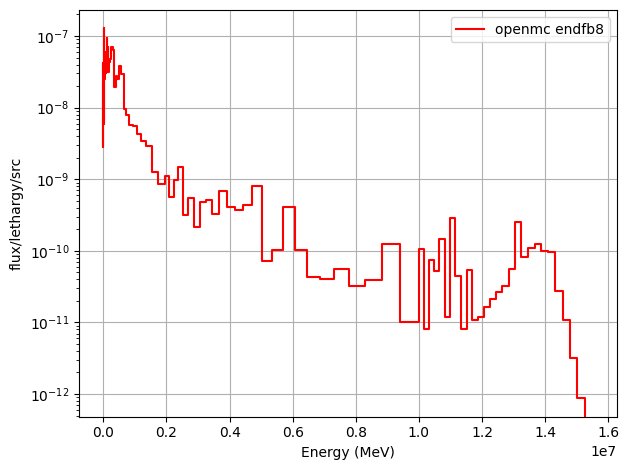

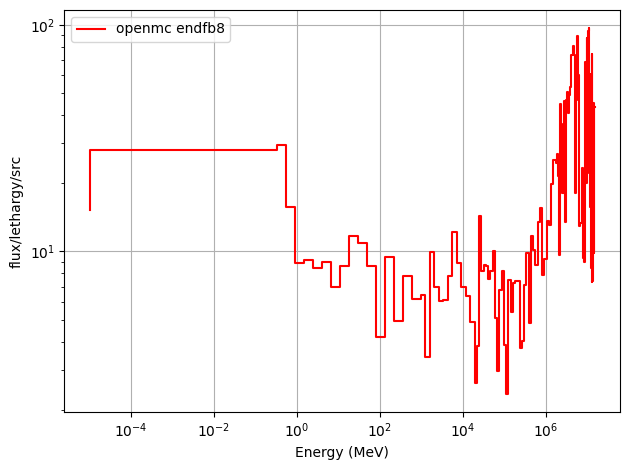

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# get results
results_ww = openmc.StatePoint(output_ww_filename)

my_tally = results_ww.get_tally(id=112).get_pandas_dataframe()
print(my_tally.iloc[8,-1]/my_tally.iloc[8,-2])


my_spectrum = results_ww.get_tally(id=208).get_pandas_dataframe()

fig, ax = plt.subplots()
p3 = ax.step(my_spectrum['energy low [eV]'], my_spectrum['mean'], ls='-', color='red', label='openmc endfb8')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('flux/lethargy/src')
ax.legend()
ax.grid()
fig.tight_layout()

fig, ax = plt.subplots()
p3 = ax.step(my_spectrum['energy low [eV]'], my_spectrum['std. dev.']/my_spectrum['mean']*100, ls='-', color='red', label='openmc endfb8')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('flux/lethargy/src')
ax.legend()
ax.grid()
fig.tight_layout()
